[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']

Data Preview:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Sma

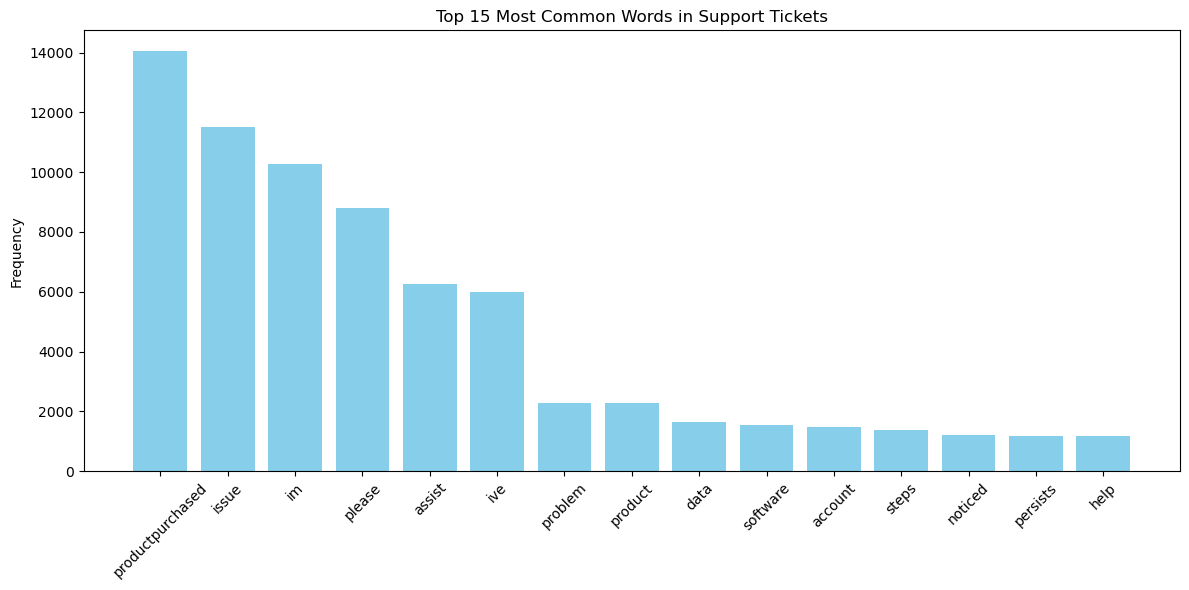

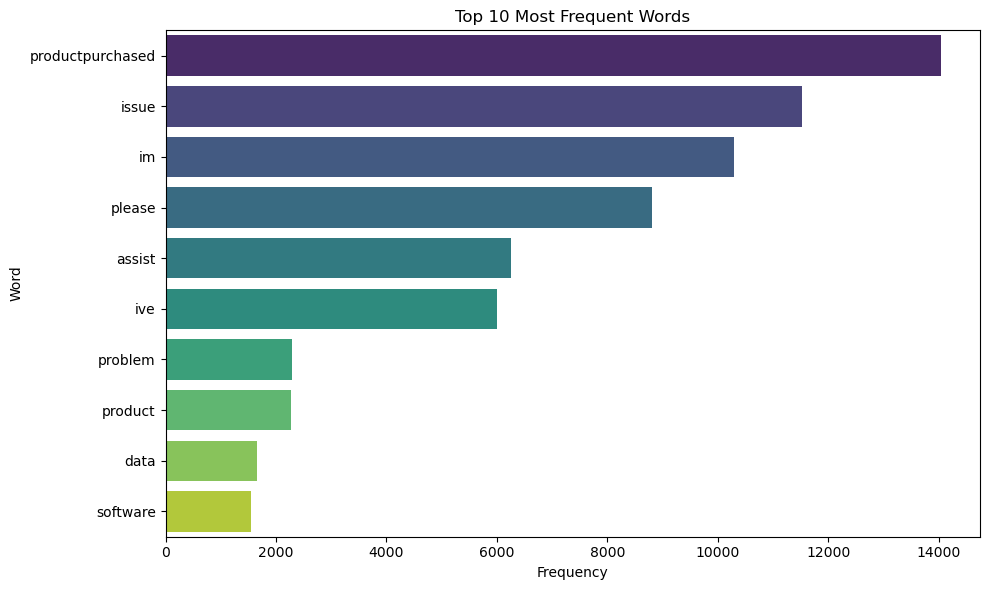

Using 1404 tickets (out of 8469) with valid resolution times.

Average Resolution Time by Priority:
Ticket Priority
Critical    7.147014
Medium      7.171359
Low         7.947405
High        8.074836
Name: Resolution Time (hrs), dtype: float64 



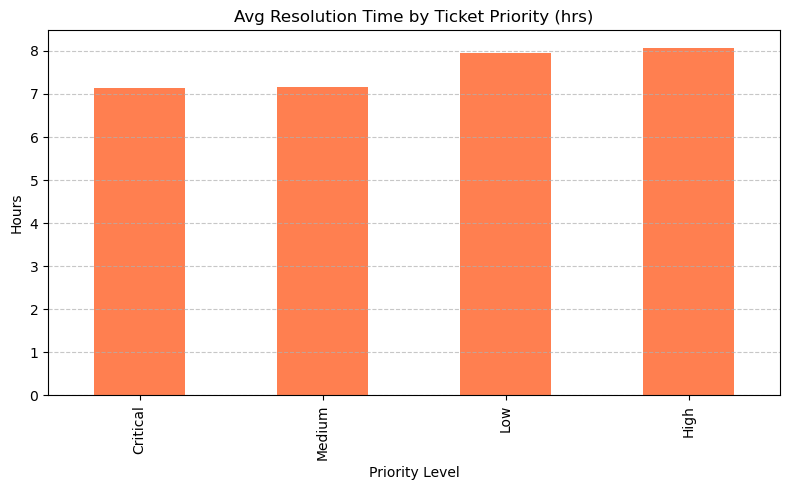

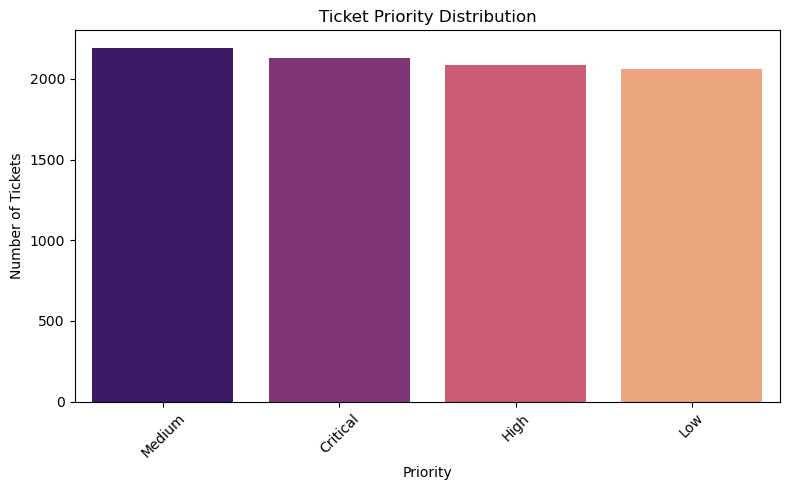

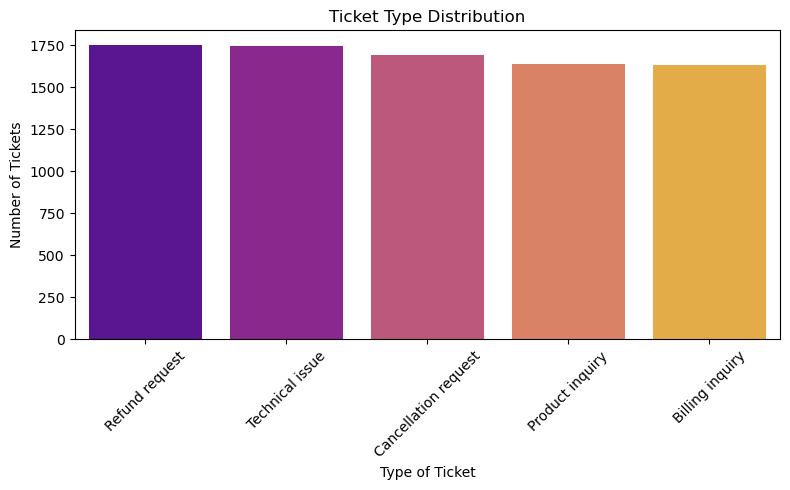

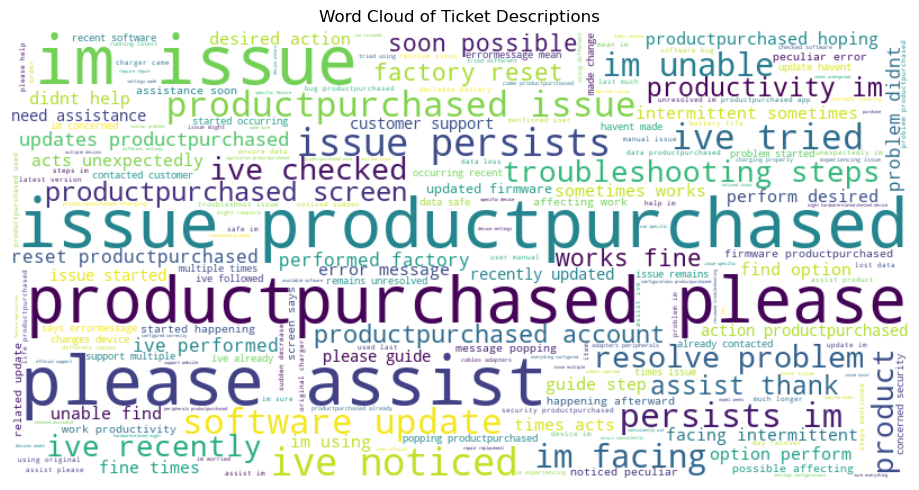

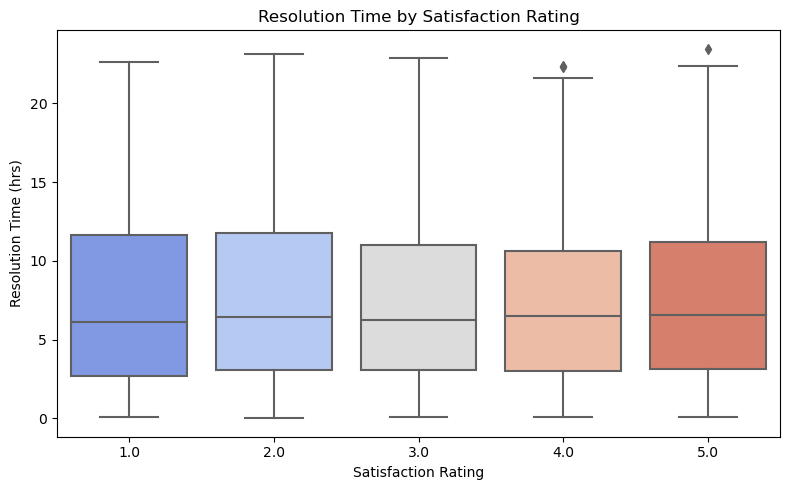

✅ RECOMMENDATIONS:
- Automate responses for the most frequent issues (identified above).
- Prioritize resources to reduce resolution times on 'Critical' priority tickets.
- Build an FAQ or bot to address top common issues instantly.
- Monitor resolution times and customer satisfaction over time to spot regressions.


In [27]:
# 📦 Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Download stopwords if not already present
nltk.download('stopwords')

# 📂 Step 2: Load the Data
file_path = r'C:\Users\USER\OneDrive\Documents\Desktop\personal\FUTURE INTERNS TASKS\CUSTOMER SUPPORT DATA ANALYSIS & TICKET\customer_support_tickets.csv'
df = pd.read_csv(file_path)

# 👀 Step 3: Explore the Data
print("Columns:", df.columns.tolist())
print("\nData Preview:")
print(df.head(), "\n")

# 📋 Step 4: Text Preprocessing Helpers
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

def preprocess_text(text):
    text = str(text).lower().translate(translator)
    tokens = [w for w in text.split() if w not in stop_words]
    return tokens

# 🏷 Step 5: Analyze Most Common Words
all_tokens = []
for desc in df['Ticket Description'].dropna():
    all_tokens += preprocess_text(desc)

top_15 = Counter(all_tokens).most_common(15)
words, counts = zip(*sorted(top_15, key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 15 Most Common Words in Support Tickets')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 📊 Step 6: Top 10 Frequent Words (bar chart)
filtered_words = [w for w in preprocess_text(' '.join(df['Ticket Description'].dropna()))]
freq_series = pd.Series(filtered_words).value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=freq_series.values, y=freq_series.index, palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# 🕓 Step 7: Time to Resolution Analysis (filter out negatives)
df_res = df.dropna(subset=['First Response Time', 'Time to Resolution']).copy()
df_res['First Response Time'] = pd.to_datetime(df_res['First Response Time'], errors='coerce')
df_res['Time to Resolution']  = pd.to_datetime(df_res['Time to Resolution'],  errors='coerce')
df_res = df_res.dropna(subset=['First Response Time', 'Time to Resolution'])

df_res['Resolution Time (hrs)'] = (
    df_res['Time to Resolution'] - df_res['First Response Time']
).dt.total_seconds() / 3600

# remove negative values
df_res = df_res[df_res['Resolution Time (hrs)'] >= 0]

print(f"Using {len(df_res)} tickets (out of {len(df)}) with valid resolution times.\n")

# Average Resolution Time by Priority
if 'Ticket Priority' in df_res.columns:
    avg_res_prio = df_res.groupby('Ticket Priority')['Resolution Time (hrs)']\
                         .mean().sort_values()
    print("Average Resolution Time by Priority:")
    print(avg_res_prio, "\n")

    plt.figure(figsize=(8,5))
    avg_res_prio.plot(kind='bar', color='coral')
    plt.title('Avg Resolution Time by Ticket Priority (hrs)')
    plt.xlabel('Priority Level')
    plt.ylabel('Hours')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 📈 Step 8: Ticket Priority Distribution (all tickets)
if 'Ticket Priority' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Ticket Priority', 
                  order=df['Ticket Priority'].value_counts().index,
                  palette='magma')
    plt.title('Ticket Priority Distribution')
    plt.xlabel('Priority')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 📈 Step 9: Ticket Type Distribution
if 'Ticket Type' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Ticket Type', 
                  order=df['Ticket Type'].value_counts().index,
                  palette='plasma')
    plt.title('Ticket Type Distribution')
    plt.xlabel('Type of Ticket')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🌐 Step 10: Word Cloud for Visual Flavor
wc = WordCloud(width=800, height=400, background_color='white')\
       .generate(' '.join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ticket Descriptions')
plt.tight_layout()
plt.show()

# 🧮 Step 11: Customer Satisfaction vs Resolution Time (optional)
if 'Customer Satisfaction Rating' in df_res.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_res, x='Customer Satisfaction Rating', y='Resolution Time (hrs)', palette='coolwarm')
    plt.title('Resolution Time by Satisfaction Rating')
    plt.xlabel('Satisfaction Rating')
    plt.ylabel('Resolution Time (hrs)')
    plt.tight_layout()
    plt.show()

# 📝 Step 12: Recommendations
print("✅ RECOMMENDATIONS:")
print("- Automate responses for the most frequent issues (identified above).")
print("- Prioritize resources to reduce resolution times on 'Critical' priority tickets.")
print("- Build an FAQ or bot to address top common issues instantly.")
print("- Monitor resolution times and customer satisfaction over time to spot regressions.")


In [21]:
# Print the column names to check for discrepancies
print(df.columns)



Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
